

## 第二讲 复杂网络的统计特征一

常见的度分布：泊松分布与幂律分布



In [1]:
import networkx as nx
import matplotlib.pyplot as plt

#### 泊松分布：以 ER 随机网络为例

In [2]:
# 创建一个包含 10000 个节点，边生成概率为 0.001 的 Erdos-Renyi 随机图
n = 10000
p = 0.001
ER = nx.erdos_renyi_graph(n, p)

In [3]:
# 获取节点 1 的度
ER.degree(1)

7

In [4]:
# 获取平均值
d = dict(nx.degree(ER))
print("平均度为：", sum(d.values()) / len(ER.nodes))

平均度为： 9.9796


In [5]:
# 获取所有可能的度值对应的概率
x = list(range(max(d.values()) + 1))
# degree_histogram 是一个用于计算图中度分布的函数，返回一个列表
y = [i / n for i in nx.degree_histogram(ER)] 

Text(0, 0.5, '$p_k$')

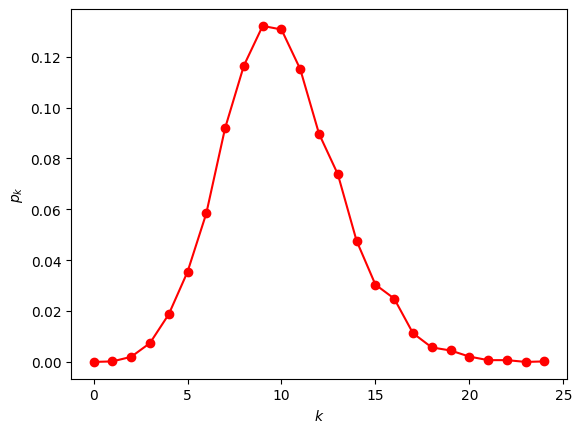

In [6]:
# 绘制度分布
plt.plot(x, y, 'ro-')
plt.xlabel("$k$")
plt.ylabel("$p_k$")

#### 幂律分布：以BA无标度网络为例

In [7]:
# 生成一个包含 10000 个节点，每个新节点连接到现有节点中的 3 个节点
m = 3
BA = nx.barabasi_albert_graph(n, m)

In [8]:
# 获取平均度
d = dict(nx.degree(BA))
print("平均度为：", sum(d.values()) / len(BA.nodes))

平均度为： 5.9982


Text(0, 0.5, '$p_k$')

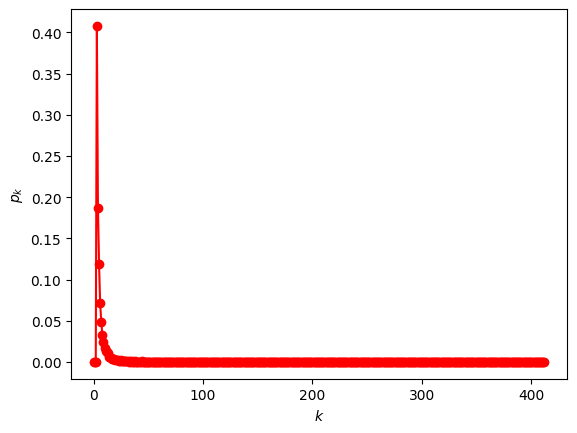

In [9]:
# 获取所有可能的度值对应的概率
x = list(range(max(d.values()) + 1))
y = [i / n for i in nx.degree_histogram(BA)]

# 绘制分布
plt.plot(x, y, 'ro-')
plt.xlabel("$k$")
plt.ylabel("$p_k$")

Text(0, 0.5, '$p_k$')

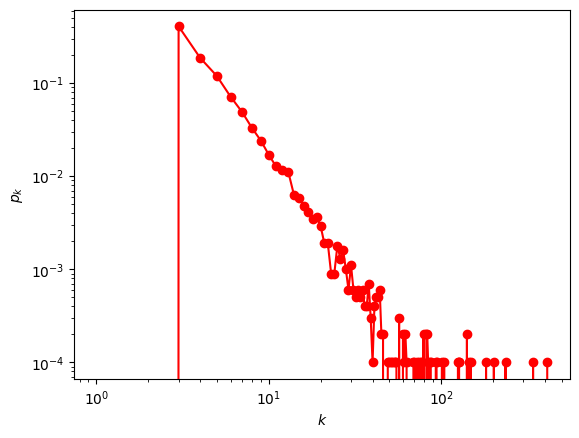

In [10]:
# 在双对数坐标轴下显示
plt.plot(x, y, 'ro-')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$k$")
plt.ylabel("$p_k$")

Text(0, 0.5, '$p_k$')

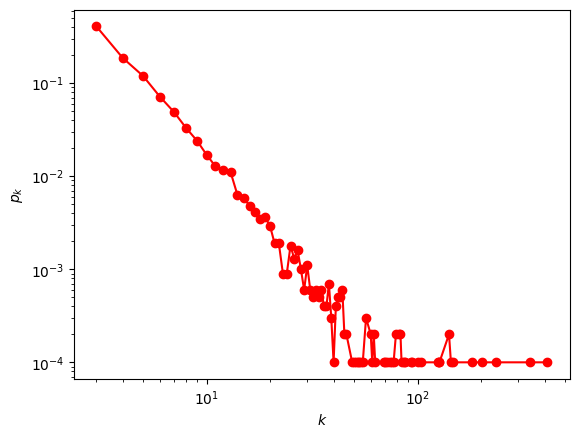

In [11]:
# 在双对数坐标轴下要把横坐标和纵坐标的0值排除掉
new_x = []
new_y = []
for i in range(len(x)):
    if y[i] != 0:
        new_x.append(x[i])
        new_y.append(y[i])
plt.plot(new_x, new_y, 'ro-')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$k$")
plt.ylabel("$p_k$")

#### 有向网络的入度、出度和总度值

In [12]:
DG = nx.DiGraph()
DG.add_nodes_from([1, 2, 3, 4])
DG.add_edges_from([(1,2),(1,4),(2,3),(4,3),(4,1)])
As = nx.adjacency_matrix(DG)
A = As.todense()
print(A)

[[0 1 0 1]
 [0 0 1 0]
 [0 0 0 0]
 [1 0 1 0]]


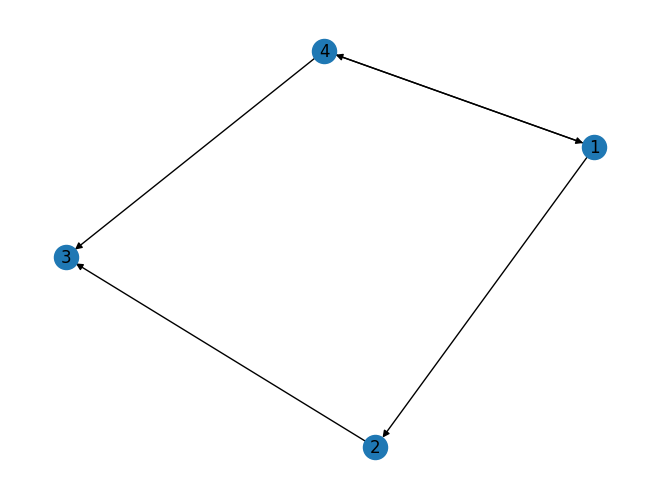

In [13]:
nx.draw(DG, with_labels=True)

In [14]:
for i in DG.nodes():
    # print(DG.in_degree(i)) # 入度
    # print(DG.out_degree(i)) # 出度
    print(DG.degree(i)) # 总度

3
2
2
3


#### 网络的直径

In [15]:
G1 = nx.barabasi_albert_graph(1000, 3)
print("网络的直径为：", nx.diameter(G1))

网络的直径为： 6


#### 网络的效率

**节点 $i$ 和节点 $j$ 间的效率**
$$E(i, j) = \frac{1}{d(i, j)}$$
其中， $d(i, j)$  是节点  $i$  和节点  $j$  之间的最短路径长度。如果节点  $i$  和节点  $j$  之间没有路径（即它们在不同的连通分量中），则效率  $E(i, j) = 0$ 。



**局部效率定义：**
$$E_{\text{loc}}(v) = \frac{1}{|N(v)|(|N(v)|-1)} \sum_{i \neq j \in N(v)} \frac{1}{d_{ij}}$$
其中， $N(v)$  是节点  $v$  的邻居节点集合， $d_{ij}$  是在子图中节点  $i$  和节点  $j$  之间的最短路径长度。


**全局效率定义：**

$$E_{glob}(G) = \frac{1}{N(N-1)} \sum_{i \neq j \in G} \frac{1}{d(i, j)}$$


其中，$N$  是网络中的节点总数，$d(i, j)$  是节点  $i$  和节点  $j$  之间的最短路径长度，如果节点  $i$  和节点  $j$  之间没有路径，则效率  $\frac{1}{d(i, j)}$  定义为  $0$ 。

- 高效网络：如果一个网络的全局效率接近于 1，这意味着网络中的大多数节点对之间都能通过较短的路径相互通信。这通常出现在高密度或完全图中。
- 低效网络：如果全局效率较低，这意味着节点之间的通信路径较长，或者某些节点对之间无法直接通信。典型的例子是稀疏网络或存在孤立子图的网络。



In [16]:
# 指定节点 i 和 j 之间的效率，前提：i 和 j 之间是可达的
print(nx.efficiency(G1, 1, 5))
print(nx.efficiency(G1, 5, 1))
print(nx.shortest_path_length(G1, 1, 5))
print(nx.shortest_path_length(G1, 5, 1))

1.0
1.0
1
1


In [17]:
# 局部效率
print(nx.local_efficiency(G1))

0.03344000301936247


In [18]:
# 全局效率，前提：G1 为连通网络
print(nx.global_efficiency(G1))

0.3028463797137786


In [19]:
# 求整个网络的平均距离，前提：G1 为连通网络
print(nx.average_shortest_path_length(G1))

3.491183183183183


#### 在计算大规模网络的有些特征时，networkx耗时很久，此时可选用一些其他高效的库，如igraph等。

In [20]:
import igraph as ig
import time

print(ig.__version__)

0.11.6


In [21]:
N, L = 5000, 25000
GNX = nx.gnm_random_graph(N, L)

while not nx.is_connected(GNX):
    GNX = nx.gnm_random_graph(N, L)

gig = ig.Graph.from_networkx(GNX)

t1 = time.perf_counter()
spl_nx = nx.average_shortest_path_length(GNX)
t2 = time.perf_counter()
print("networkx 计算需要时间为：", t2 - t1)

t3 = time.perf_counter()
spl_ig = gig.average_path_length()
t4 = time.perf_counter()
print("igraph   计算需要时间为：", t4 - t3)

networkx 计算需要时间为： 7.0297920419999995
igraph   计算需要时间为： 0.5791291249999997


In [22]:
# 维纳指数：所有节点的最短路径之和
print(nx.wiener_index(G1))

1743846.0


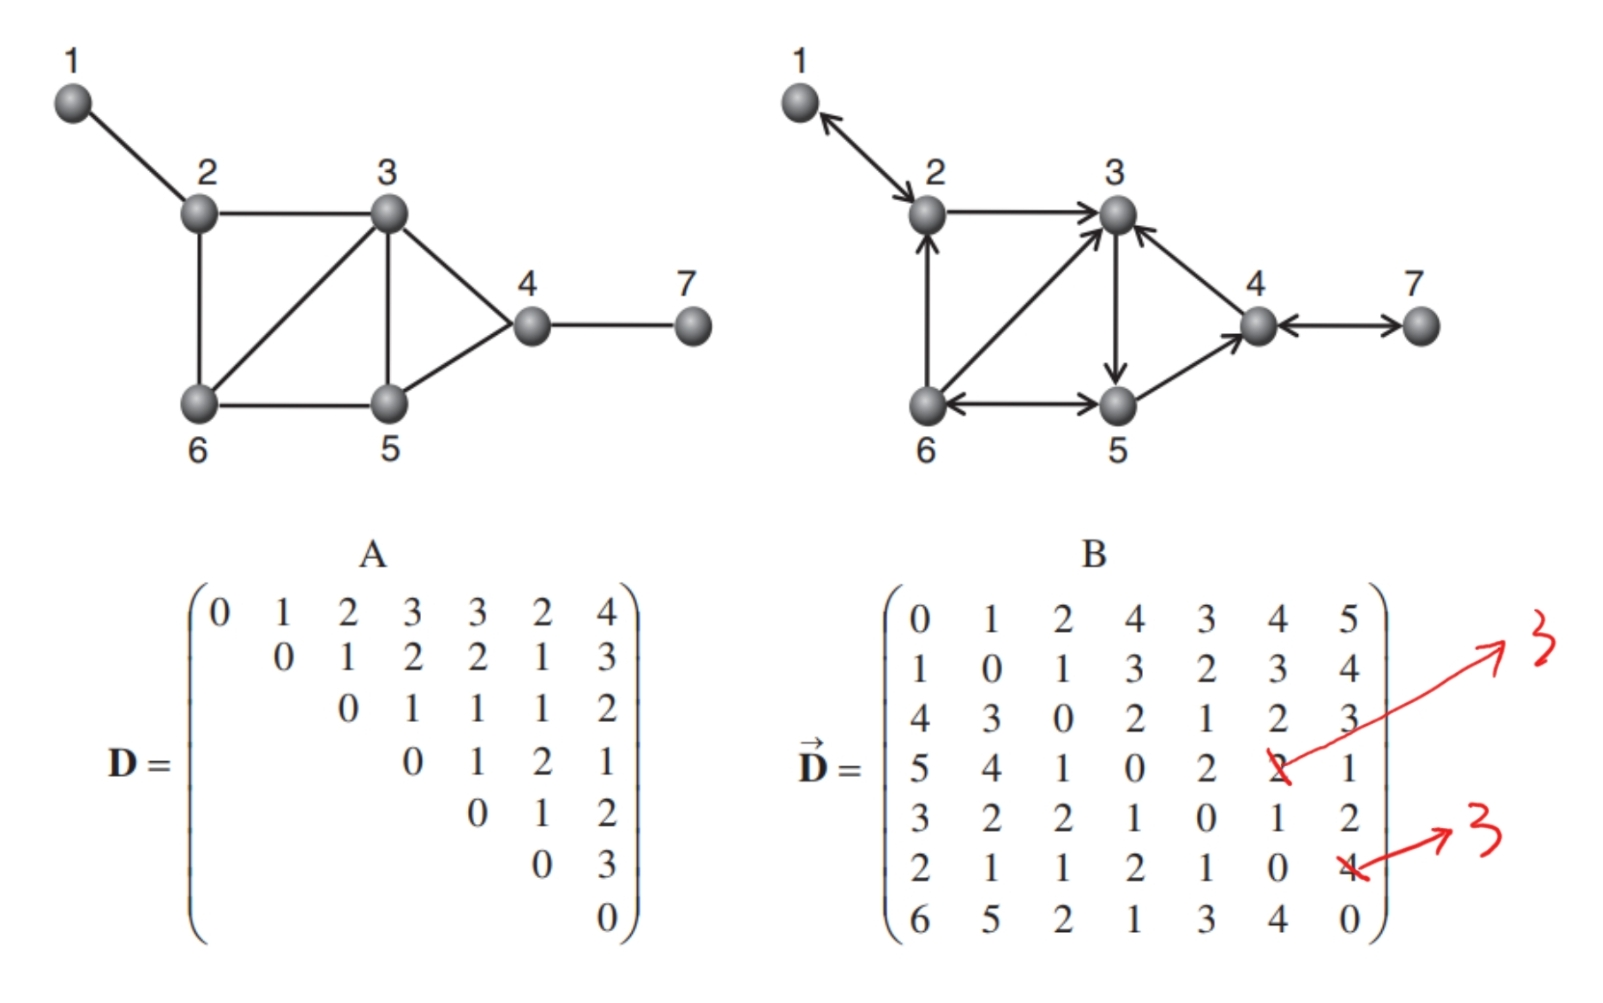

In [23]:
from IPython.display import Image
Image(filename='distance.jpg', width=600, height=400) # 显示

In [24]:
import numpy as np

In [25]:
UG = nx.Graph([(1,2),(2,3),(2,6),(3,4),(3,5),(3,6),(4,5),(4,7),(5,6)])
print(dict(nx.shortest_path_length(UG)))

{1: {1: 0, 2: 1, 3: 2, 6: 2, 4: 3, 5: 3, 7: 4}, 2: {2: 0, 1: 1, 3: 1, 6: 1, 4: 2, 5: 2, 7: 3}, 3: {3: 0, 2: 1, 4: 1, 5: 1, 6: 1, 1: 2, 7: 2}, 6: {6: 0, 2: 1, 3: 1, 5: 1, 1: 2, 4: 2, 7: 3}, 4: {4: 0, 3: 1, 5: 1, 7: 1, 2: 2, 6: 2, 1: 3}, 5: {5: 0, 3: 1, 4: 1, 6: 1, 2: 2, 7: 2, 1: 3}, 7: {7: 0, 4: 1, 3: 2, 5: 2, 2: 3, 6: 3, 1: 4}}


In [26]:
D = np.array([nx.shortest_path_length(UG, i, j) for i in range(1, 8) for j in range(1, 8)]).reshape(7, 7)
D

array([[0, 1, 2, 3, 3, 2, 4],
       [1, 0, 1, 2, 2, 1, 3],
       [2, 1, 0, 1, 1, 1, 2],
       [3, 2, 1, 0, 1, 2, 1],
       [3, 2, 1, 1, 0, 1, 2],
       [2, 1, 1, 2, 1, 0, 3],
       [4, 3, 2, 1, 2, 3, 0]])

In [27]:
DG = nx.DiGraph([(1,2),(2,1),(2,3),(3,5),(4,3),(4,7),(5,4),(5,6),(6,2),(6,3),(6,5),(7,4)])
print(dict(nx.shortest_path_length(DG)))

{1: {1: 0, 2: 1, 3: 2, 5: 3, 4: 4, 6: 4, 7: 5}, 2: {2: 0, 1: 1, 3: 1, 5: 2, 4: 3, 6: 3, 7: 4}, 3: {3: 0, 5: 1, 4: 2, 6: 2, 7: 3, 2: 3, 1: 4}, 5: {5: 0, 4: 1, 6: 1, 3: 2, 7: 2, 2: 2, 1: 3}, 4: {4: 0, 3: 1, 7: 1, 5: 2, 6: 3, 2: 4, 1: 5}, 7: {7: 0, 4: 1, 3: 2, 5: 3, 6: 4, 2: 5, 1: 6}, 6: {6: 0, 2: 1, 3: 1, 5: 1, 1: 2, 4: 2, 7: 3}}


In [28]:
D2 = np.array([nx.shortest_path_length(DG, i, j) for i in range(1, 8) for j in range(1, 8)]).reshape(7, 7)
D2

array([[0, 1, 2, 4, 3, 4, 5],
       [1, 0, 1, 3, 2, 3, 4],
       [4, 3, 0, 2, 1, 2, 3],
       [5, 4, 1, 0, 2, 3, 1],
       [3, 2, 2, 1, 0, 1, 2],
       [2, 1, 1, 2, 1, 0, 3],
       [6, 5, 2, 1, 3, 4, 0]])

In [29]:
# 两个节点间最短路径数
print(list(nx.all_shortest_paths(UG, 1, 5)))
print(len(list(nx.all_shortest_paths(UG, 1, 5))))

[[1, 2, 3, 5], [1, 2, 6, 5]]
2


#### 节点集聚系数

In [30]:
print(nx.clustering(UG)) # 以字典的形式打印所有节点的局部集聚系数

{1: 0, 2: 0.3333333333333333, 3: 0.5, 6: 0.6666666666666666, 4: 0.3333333333333333, 5: 0.6666666666666666, 7: 0}


#### 平均集聚系数

In [31]:
print(nx.average_clustering(UG))

0.35714285714285715


#### 全局集聚系数

In [32]:
print(nx.transitivity(UG))

0.5


#### 有向网络的互惠性

In [33]:
print(nx.number_of_edges(DG))

12


In [34]:
# 每个节点的局部互惠性
rec = {i: nx.reciprocity(DG, i) for i in DG.nodes()}
print(rec)

{1: 1.0, 2: 0.5, 3: 0.0, 5: 0.5, 4: 0.5, 7: 1.0, 6: 0.5}


In [35]:
# 全局互惠性：整个网络中相互连接的边占总有向边数的比例
print(nx.reciprocity(DG))

0.5


#### 接近度中心性

对于一个节点  $v$  ，其接近度中心性  $C(v)$  定义为：


$$C(v) = \frac{1}{\sum_{u \neq v} d(v, u)}$$


其中：$d(v, u)$  是节点  $v$  到节点  $u$  的最短路径距离，接近度中心性是所有这些最短路径距离的总和的倒数。

在标准化的情况下，接近度中心性还会乘以一个因子，使其值在  $[0, 1]$  之间：


$$C(v) = \frac{N-1}{\sum_{u \neq v} d(v, u)}$$


其中  $N$  是网络中节点的总数。标准化后，接近度中心性反映了节点的相对接近程度。

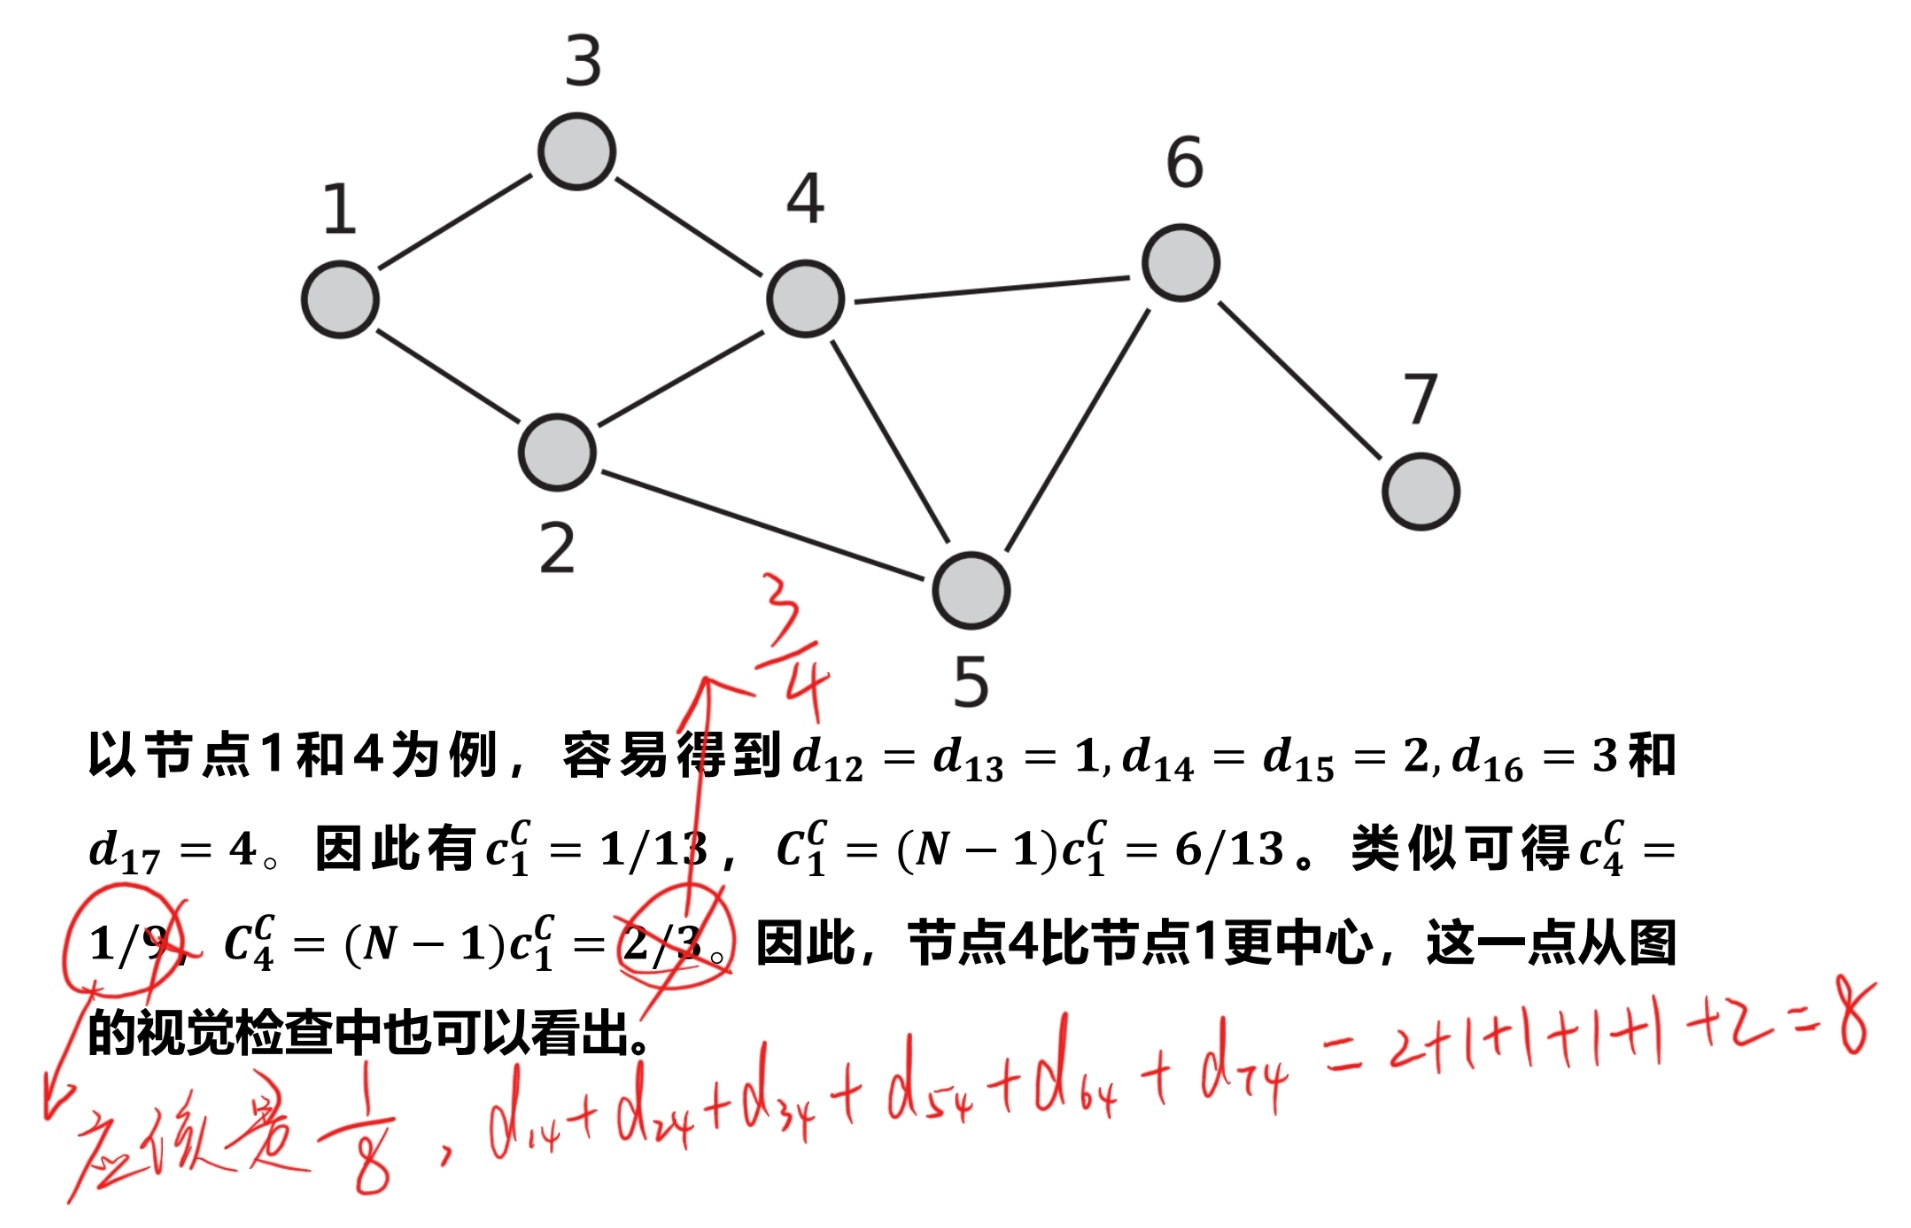

In [36]:
G = nx.Graph([(1,2),(1,3),(2,4),(2,5),(3,4),(4,5),(4,6),(5,6),(6,7)])
Image(filename='接近度中心性.jpg', width=600, height=400)

In [37]:
# 计算并返回图 G 中所有节点的接近度中心性，结果是一个字典，其中每个键是节点，值是该节点的接近度中心性。
print(nx.closeness_centrality(G))

{1: 0.46153846153846156, 2: 0.6, 3: 0.5454545454545454, 4: 0.75, 5: 0.6666666666666666, 6: 0.6, 7: 0.4}


#### 介数中心性

给定图  $G$ ，节点  $v$  的介数中心性  $C_B(v)$  定义为：


$$C_B(v) = \sum_{s \neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}}$$


其中：
- $\sigma_{st}$  是从节点  $s$  到节点  $t$  的最短路径的总数。
- $\sigma_{st}(v)$  是从节点  $s$  到节点  $t$  的所有最短路径中经过节点  $v$  的路径数。



介数中心性可以是标准化的，将其值调整到 $[0, 1]$ 之间。标准化的介数中心性公式如下：


$$C_B(v) = \frac{2}{(n-1)(n-2)} \sum_{s \neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}}$$


其中  $n$  是网络中节点的总数。

In [38]:
# 计算并返回图 G 中所有节点的介数中心性
bc = nx.betweenness_centrality(G, normalized=True)
print(bc)

{1: 0.03333333333333333, 2: 0.18888888888888888, 3: 0.07777777777777777, 4: 0.38888888888888884, 5: 0.1111111111111111, 6: 0.3333333333333333, 7: 0.0}


#### 边介数

对于一条边  $e = (u, v)$ ，其边介数中心性  $C_B(e)$  定义为：


$$C_B(e) = \sum_{s \neq t} \frac{\sigma_{st}(e)}{\sigma_{st}}$$


其中：

- $\sigma_{st}$  是从节点  $s$  到节点  $t$  的所有最短路径的数量。
- $\sigma_{st}(e)$  是从节点  $s$  到节点  $t$  的所有最短路径中经过边  $e$  的路径数。


In [39]:
ebc = nx.edge_betweenness_centrality(G)
ebc

{(1, 2): 0.2063492063492063,
 (1, 3): 0.12698412698412695,
 (2, 4): 0.17460317460317457,
 (2, 5): 0.17460317460317457,
 (3, 4): 0.2698412698412698,
 (4, 5): 0.09523809523809523,
 (4, 6): 0.30158730158730157,
 (5, 6): 0.1746031746031746,
 (6, 7): 0.2857142857142857}

#### 核度

给定一个图 $G$ ，其  $k$-核是一个极大子图  $H$ ，满足以下条件：


- 子图  $H$  中的每个节点的度数（在子图中的度）至少为  $k$ 。


核度（Coreness）或核指数（Core number）是与每个节点关联的整数，表示该节点属于的最高  $k$-核。

**核度值越大，说明该节点在网络中处于更核心的位置。**


In [48]:
ks = nx.core_number(G)
print(ks)

{1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 1}


#### 团

团是图论中的一个完全子图。在一个无向图中，如果一个子图中的任意两个节点之间都有直接连接（即存在边），那么这个子图被称为一个团。
    
即：**团中的所有节点都两两相连。**

- 最大团（Maximal Clique）：一个团是最大团，当无法通过添加一个节点将它扩展为更大的团时。
- 最大团（Maximum Clique）：一个图中的最大团是包含节点最多的团。

In [50]:
# 返回无向图中的所有团
print(list(nx.enumerate_all_cliques(G)))

[[1], [2], [3], [4], [5], [6], [7], [1, 2], [1, 3], [2, 4], [2, 5], [3, 4], [4, 5], [4, 6], [5, 6], [6, 7], [2, 4, 5], [4, 5, 6]]


####  k-分量

k-分量 是图中一个连通子图，其中每个节点至少通过  $k$  条独立的路径（即不共享边的路径）与子图中的其他节点相连。

即：**在一个 $k$-分量中，至少要移除  $k$  个节点才能使得该分量分裂为多个部分或断开连接**

- 1-分量 是一个标准的连通分量。
- 2-分量 是一个子图，其中每一对节点之间至少有两条独立的路径（即该子图是 2-连通的）。
- 3-分量 是一个子图，其中每一对节点之间至少有三条独立的路径。

In [51]:
# 计算k分量
from networkx.algorithms import approximation as apxa
k_components = apxa.k_components(G)
k_components

defaultdict(list, {1: [{1, 2, 3, 4, 5, 6, 7}], 2: [{1, 2, 3, 4, 5, 6}]})

#### 网络密度


给定一个无向图  $G = (V, E)$ ，其中  $V$  是节点集， $E$  是边集。网络密度  $D$  定义为：


$$D = \frac{2 \times |E|}{|V| \times (|V| - 1)}$$


其中：

- $|V|$  是节点的数量。
- $|E|$  是边的数量。
- 分母  $\frac{1}{2}|V| \times (|V| - 1)$  表示图中可能的最大边数（完全图的边数）。

对于有向图，网络密度的定义稍有不同，因为边是有方向的，可能存在反向边：


$$D = \frac{|E|}{|V| \times (|V| - 1)}$$


在这种情况下，分母表示有向完全图中可能的最大边数。


In [52]:
print(nx.density(G))

0.42857142857142855
